In [1]:
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.stats import gaussian_kde
import numpy as np
import math
import os

In [12]:
dir_name

'npe_n_obs_1000_n_sims_10000_seed_0'

## KL - incompatibility

In [16]:
kls

[]

[10.181590571812903, 10.545230602821748, 5.402886393524097, 2.385192961587039]
[12.86512930055509, 12.353173398824222, 6.856933356592596, 4.111730239361437]
[12.822909249052662, 12.218902028004962, 6.391689202335659, 4.865280828762983]
[8.379417968079728, 8.43556825886675, 5.3136503788645, 5.461074425864654]


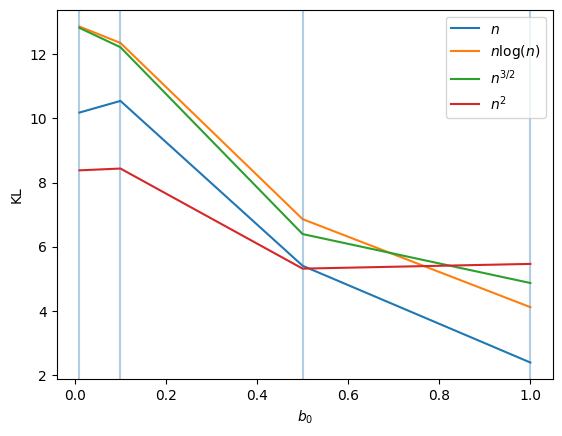

In [28]:
# os.listdir('../res/ma2_b0/')
n_sims_label = [r'$n$', r'$n \log(n)$', r'$n^{3/2}$', r'$n^2$']
dirnames = ['npe_n_obs_1000_n_sims_1000_seed_0',
            'npe_n_obs_1000_n_sims_6907_seed_0',
            'npe_n_obs_1000_n_sims_31622_seed_0',
            'npe_n_obs_1000_n_sims_1000000_seed_0']

for ii, dir_name in enumerate(dirnames):
    kls = []
    b_0_0s = [0.01, 0.1, 0.5, 1.0]
    for b_0 in b_0_0s:
        plt.axvline(b_0, 0, alpha=0.1)
    for b_0 in b_0_0s:
        try:
            with open(f'../res/ma2_b0/{dir_name}/kl_{str(b_0)}.txt', 'rb') as f:
                kl = f.read()
                kls.append(float(kl))
        except FileNotFoundError as e:
            print(e)
            continue
    if len(kls) == 4:
        print(kls)
        plt.plot(b_0_0s, kls, label=n_sims_label[ii])
        plt.xlabel(r"$b_0$")
        plt.ylabel(r"KL")
        plt.legend()
        
plt.savefig("plots/kl_vs_b0.pdf")

In [6]:
kl

NameError: name 'kl' is not defined

In [4]:
n_obs_list = [100, 500, 1000, 5000]
simulation_functions = [
    lambda n: n,
    lambda n: int(n * math.log(n)),
    lambda n: int(n ** (3/2)),
    lambda n: n ** 2
]
n_sims_label = [r'$n$', r'$n \log(n)$', r'$n^{3/2}$', r'$n^2$']

num_seeds = 21
true_param = 0.6

base_dir = "../res_02102024/ma2/"

for n_obs in n_obs_list:
    all_mean_biases = []
    labels = []
    for ii, sim_fn in enumerate(simulation_functions):
        n_sims = sim_fn(n_obs)
        mean_biases = []
        for i in range(num_seeds):
            dir_path = os.path.join(base_dir, f"npe_n_obs_{n_obs}_n_sims_{n_sims}_seed_{str(i)}")
            if os.path.exists(dir_path):
                full_path = os.path.join(dir_path, "posterior_samples.pkl")
                try:
                    with open(full_path, 'rb') as file:
                        posterior_samples = pkl.load(file)
                        seed_mean_bias = np.mean(posterior_samples, axis=0)[0] - true_param
                        mean_biases.append(seed_mean_bias)
                except FileNotFoundError:
                    continue
        all_mean_biases.append(mean_biases)
        labels.append(n_sims_label[ii])

    plt.figure(figsize=(10, 6))
    plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='blue'), capprops=dict(color='blue'))
    # plt.title(f'Boxplot of Mean Biases for $n_{{\text{{obs}}}}={n_obs}$', fontsize=16)
    plt.xlabel('Number of Simulations', fontsize=24)
    plt.ylabel('Mean Bias', fontsize=24)
    plt.axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
    # plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=18)
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'plots/ma2_t1_boxplot_n_obs_{n_obs}.pdf')
    plt.close()

/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_2195/3508738703.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_2195/3508738703.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_2195/3508738703.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipy

In [5]:
n_obs_list = [100, 500, 1000, 5000]
simulation_functions = [
    lambda n: n,
    lambda n: int(n * math.log(n)),
    lambda n: int(n ** (3/2)),
    lambda n: n ** 2
]
n_sims_label = [r'$n$', r'$n \log(n)$', r'$n^{3/2}$', r'$n^2$']

num_seeds = 21
true_param = 0.2

base_dir = "../res_02102024/ma2/"

for n_obs in n_obs_list:
    all_mean_biases = []
    labels = []
    for ii, sim_fn in enumerate(simulation_functions):
        n_sims = sim_fn(n_obs)
        mean_biases = []
        for i in range(num_seeds):
            dir_path = os.path.join(base_dir, f"npe_n_obs_{n_obs}_n_sims_{n_sims}_seed_{str(i)}")
            if os.path.exists(dir_path):
                full_path = os.path.join(dir_path, "posterior_samples.pkl")
                try:
                    with open(full_path, 'rb') as file:
                        posterior_samples = pkl.load(file)
                        seed_mean_bias = np.mean(posterior_samples, axis=0)[1] - true_param
                        mean_biases.append(seed_mean_bias)
                except FileNotFoundError:
                    continue
        all_mean_biases.append(mean_biases)
        labels.append(n_sims_label[ii])

    plt.figure(figsize=(10, 6))
    plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red', linewidth=2),
                whiskerprops=dict(color='blue'), capprops=dict(color='blue'))
    # plt.title(f'Boxplot of Mean Biases for $n_{{\text{{obs}}}}={n_obs}$', fontsize=16)
    plt.xlabel('Number of Simulations', fontsize=24)
    plt.ylabel('Mean Bias', fontsize=24)
    plt.axhline(y=0, color='red', linestyle='dashed', linewidth=1.5)
    # plt.legend(fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=18)
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'plots/ma2_t2_boxplot_n_obs_{n_obs}.pdf')
    plt.close()

/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_2195/3561857824.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_2195/3561857824.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipykernel_2195/3561857824.py:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_mean_biases, labels=labels, patch_artist=True,
/var/folders/_z/ms2f3nmn0bb7wk4py9_pz7900000gp/T/ipy